In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [33]:
#Creating x and y variables by using make classifications
x, y = make_classification(n_samples = 9000, n_features=18,n_informative=4,n_redundant = 12, random_state=4)


In [34]:
#Spliting X and Y values for training (70%) and test data (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [35]:
#Emplt list of train and test scorez
train_scores, test_scores = list(),list()

In [36]:
#Creating for 21 values
values = [i for i in range(1,21)]

In [37]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i) #Checking the model performance for various depths
    model.fit(x_train, y_train) #Fitting of the model
    train_yhat = model.predict(x_train) #Model predict of X training data
    train_acc = accuracy_score(y_train, train_yhat) #Giving an accuracy score for the training data
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    train_scores.append(train_acc)
    print('>%d, train %.3f test: %.3f' %(i, train_acc, test_acc))

>1, train 0.839 test: 0.831
>2, train 0.854 test: 0.844
>3, train 0.869 test: 0.860
>4, train 0.892 test: 0.878
>5, train 0.914 test: 0.898
>6, train 0.920 test: 0.900
>7, train 0.934 test: 0.906
>8, train 0.949 test: 0.916
>9, train 0.970 test: 0.937
>10, train 0.978 test: 0.940
>11, train 0.984 test: 0.942
>12, train 0.989 test: 0.942
>13, train 0.992 test: 0.947
>14, train 0.995 test: 0.941
>15, train 0.997 test: 0.943
>16, train 0.997 test: 0.940
>17, train 0.998 test: 0.938
>18, train 0.998 test: 0.937
>19, train 0.999 test: 0.935
>20, train 0.999 test: 0.941


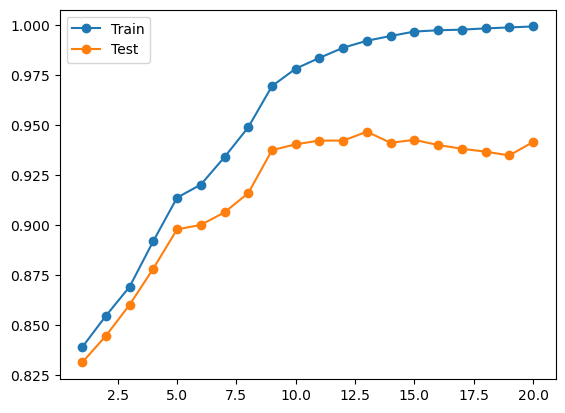

In [38]:
pyplot.plot(values, train_scores, '-o',label='Train')
pyplot.plot(values, test_scores,'-o',label="Test")
pyplot.legend()
pyplot.show()

In [46]:
from sklearn.model_selection import GridSearchCV #Prevent overfitting

In [48]:
#Creation of a parameter grid with criteria and maximum depth
param_grid = {'criterion':['gini','entropy'], 'max_depth':[2, 4, 6, 10, 20], 'min_samples_split':[5, 10, 20, 50, 100]}
#Creating a gridsearch with a cross validation of 3 and n_job is parallel processing and scoring which is based on accuracy
clf = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=3, n_jobs = -1, scoring = "accuracy")
clf.fit(x_train,y_train) #Adding to the training dataset

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [49]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10)

In [52]:
#Printing the accuracy to check if we can work on the overfitting problem
print(accuracy_score(y_train, clf.best_estimator_.predict(x_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(x_test)))

0.9898412698412699
0.9422222222222222
